In [55]:
import xarray
import xarray as xr
from Chemometrics.import_common import *
%matplotlib inline

In [226]:
def get_peaks(file):
    # 获取netcdf中各峰信息
    
    ds = xr.open_dataset(file)
    peaks = [ds[var] for var in ds.data_vars if ds[var].dims==('peak_number',)]
    _df = xr.merge(peaks).to_dataframe()
    to_drop = ['peak_start_detection_code',
               'peak_stop_detection_code',
               'manually_reintegrated_peaks',
              'peak_start_time',
                 'peak_end_time',
                 'baseline_start_time',
                 'baseline_stop_time',
                 'peak_area',
                 'peak_height',
                 'peak_area_percent',
                 'peak_height_percent',
                 'peak_area_square_root',
                 'baseline_stop_value',
                 'migration_time']
    df = _df.drop(to_drop, axis=1)
    return df

In [224]:
import glob

In [227]:
files = glob.glob('./data/data-典型区分酒样/GC-data-V2-20180120.AIA/*.cdf')
peaks = [get_peaks(file) for file in files]

In [228]:
ps0,ps1 = peaks[0],peaks[1]
p11 = ps1.loc[1]

In [229]:
((ps0.loc[1]/ps1-1)**2).sum(axis=1).sort_values()

peak_number
3     0.048546
1     0.059019
4     0.078624
0     0.088270
5     0.113547
7     0.122271
6     0.143301
2     0.199729
8     0.205914
13    0.285535
9     0.295758
15    0.345429
12    0.361740
10    0.384455
14    0.428712
17    0.488929
16    0.509641
19    0.714790
11    0.767622
51    0.811498
47    0.858355
36    0.867603
18    0.911059
46    0.960842
41    1.051903
39    1.055699
22    1.116932
58    1.132582
55    1.166597
57    1.178604
37    1.192482
21    1.224637
42    1.249025
20    1.268126
48    1.316504
24    1.322317
26    1.436550
54    1.451604
34    1.468345
35    1.514726
27    1.544764
28    1.621179
49    1.635201
50    1.658167
38    1.660803
44    1.672590
52    1.694270
29    1.715605
45    1.748839
40    1.827127
25    1.827556
33    1.866816
30    2.080425
31    2.101362
53    2.120581
56    2.189309
32    2.322154
43    2.463038
23    3.901691
dtype: float32

In [247]:
ps0.loc[8],ps1.loc[8]

(peak_retention_time     737.353577
 peak_width                1.857719
 peak_asymmetry            1.558417
 baseline_start_value      3.720483
 Name: 8, dtype: float32, peak_retention_time     836.910950
 peak_width                2.829083
 peak_asymmetry            1.247230
 baseline_start_value      3.183123
 Name: 8, dtype: float32)

In [249]:
w = [3,1,1,1] #what are the fucking weights?
[((abs(ps0.loc[i]/ps1-1)).dot([5,1,1,1]).min(),i,(abs(ps0.loc[i]/ps1-1)).dot([5,1,1,1]).idxmin())for i in range(len(ps0))]

[(0.21446537971496582, 0, 0),
 (0.297052264213562, 1, 1),
 (0.12613797187805176, 2, 2),
 (0.12864422798156738, 3, 3),
 (0.07571572065353394, 4, 4),
 (0.29796653985977173, 5, 5),
 (0.2985681891441345, 6, 6),
 (0.16260164976119995, 7, 7),
 (1.3564571738243103, 8, 8),
 (0.14062410593032837, 9, 8),
 (0.1259908676147461, 10, 8),
 (0.10113978385925293, 11, 10),
 (0.06545060873031616, 12, 11),
 (0.26271820068359375, 13, 12),
 (0.24694955348968506, 14, 13),
 (0.20267468690872192, 15, 14),
 (0.06297677755355835, 16, 15),
 (0.27911096811294556, 17, 17),
 (0.18786609172821045, 18, 17),
 (0.1332722306251526, 19, 18),
 (0.1433820128440857, 20, 19),
 (0.4585524797439575, 21, 20),
 (0.09728682041168213, 22, 21),
 (0.2591487169265747, 23, 22),
 (0.2442120909690857, 24, 23),
 (0.2242199182510376, 25, 24),
 (0.10804051160812378, 26, 24),
 (0.2573772668838501, 27, 24),
 (0.2691463232040405, 28, 24),
 (0.13452225923538208, 29, 27),
 (0.2135244607925415, 30, 28),
 (0.1617719531059265, 31, 29),
 (0.24895447

In [179]:
ps0.iloc[-1]

peak_retention_time     2251.886963
peak_width                 1.903203
peak_height                1.424932
peak_asymmetry             1.139033
baseline_start_value       4.554455
Name: 58, dtype: float32

In [211]:
#相关系数
ps1.corr()

,peak_retention_time,peak_width,peak_height,peak_asymmetry,baseline_start_value
peak_retention_time,1.000000,-0.606166,-0.080743,0.209054,0.808170
peak_width,-0.606166,1.000000,-0.061752,-0.018245,-0.246329
peak_height,-0.080743,-0.061752,1.000000,-0.049248,-0.112936
peak_asymmetry,0.209054,-0.018245,-0.049248,1.000000,0.053670
baseline_start_value,0.808170,-0.246329,-0.112936,0.053670,1.000000


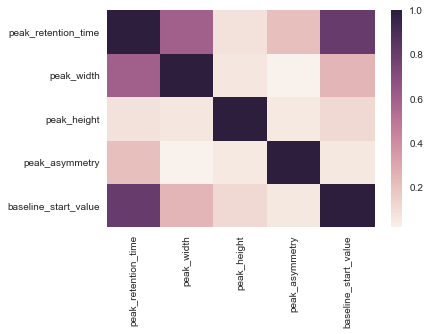

In [212]:
sns.heatmap(ps1.corr().abs())
#基线高度和保留时间相关性较大0.8
#峰宽和保留时间相关性也较大0.6